In [ ]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

#**Question 1**

#Data set Link 
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [ ]:
# Importing necessary libraries
import os  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
%matplotlib inline

In [ ]:
# Loading the dataset in python with the name df and displaying first 5 rows: 
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Ain/winequality-red.csv", sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data cleaning/wrangling: 

Here we take the make the dataset usable for our work. 
This involves taking care of missing values, making sure all the object types are correct etc.


In [ ]:

#Getting an overall picture of the data types and shape of our dataset :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Taking sum of all missing values in each column:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Above, we can see that there are 12 columns and 1599 observations/rows. All the data types are correctly put however, we can change quality into a float object for regression.

# Handling missing variables:

There are multiple ways of handling missing variables from removing all the columns to complex prediction methods for the missing variables. However, we will simply assume them to be the mean of the entire column. This allows us to retain the rest of the information of the observation with the missing data while making a reasonable assumption for the missing value.

In [ ]:
df=df.fillna(df.mean())

We will change the object type whenever depending on the model we are going to use and we will do it in our modelling section. Hence we have completed our cleaning section of our project. Next we will do a exploratory data analysis to see which variables are useful and each of their relationships etc. We will be using matplotlib as well as seaborn to conduct our EDA.

# Exploratory Data Analysis


There are only 12 variables hence conducting an EDA is not that hard and we will be able to look at most variables in depth. First, we will take a look at the summary statistics of the dataset.




In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


One thing that we can take note of is that the different variables are on different scales, and hence we might be better of rescaling all of the data which we will explore in the next section of preprocessing.

Next we will take a look at the correlation between all the variables by looking at the scatter plots between them.

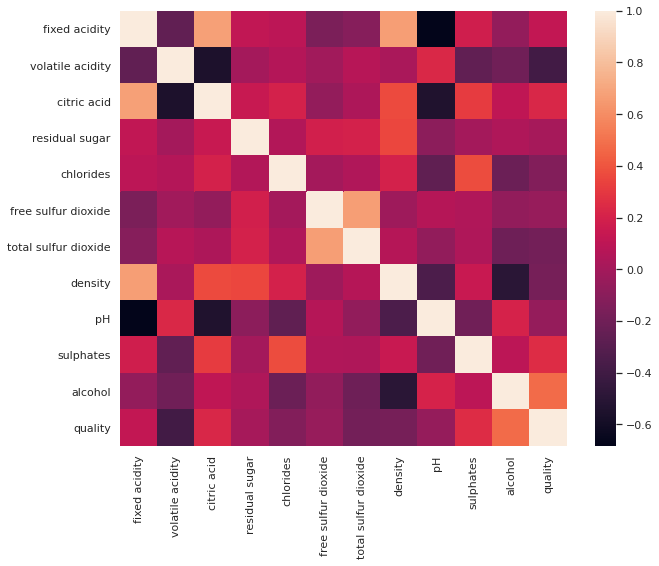

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

One point we can note is the fact that there is a good amount of multicollinearity, which could be potentially taken care of by using methods such as Ridge Regression or lasso regression.

Next we will take a look at whether the color of the wine has a role in its quality. For that we will use boxplots.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:100: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f36c3506cf8> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


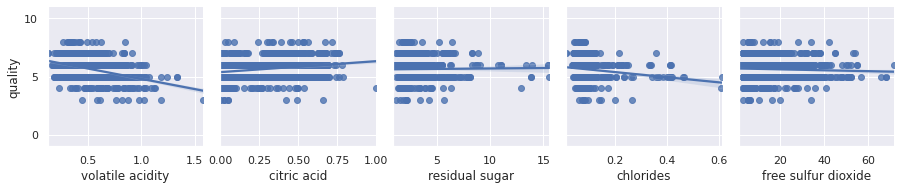

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:100: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f36c63599b0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


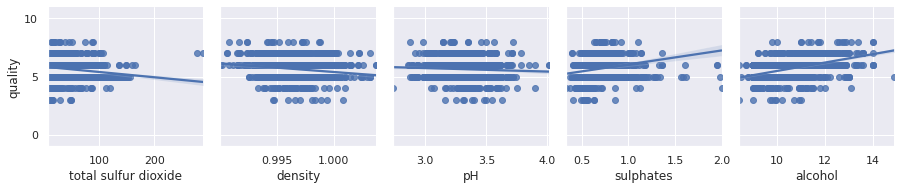

In [ ]:
g = sns.PairGrid(df, y_vars=["quality"], x_vars=list(df)[1:-6],palette="GnBu_d")
g.map(sns.regplot)
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);
g.add_legend()
plt.show()

a = sns.PairGrid(df, y_vars=["quality"], x_vars=list(df)[-6:-1],palette="GnBu_d")
a.map(sns.regplot)
a.set(ylim=(-1, 11), yticks=[0, 5, 10]);
a.add_legend()
plt.show()

One major point to note from the graph above is the categorical/ordinal nature of the response variable. This could mean that regression might not be the most optimal method for predicting values.Also note that even though the type of wine doesnt seem to have any notable impact on our response variable, it does seem to have a impact on the various independant variables.

With this we conclude with our EDA section and move to our next portion that is data preprocessing using sk-learn.

# Data preprocessing



One thing we could do is eliminate some more columns which are highly correlated with each other, however, since we will be using lasso as well as ridge regression we will not make any further adjustments.

Next,we will normalize the independant variables. so as to reduce bias towards any particular variables. This is quite useful as the range of the variables are highly varied between the variables and name our independant variables x and target variable y. We will scale the values of all our independant variables to a range of 0-1. We will leave our target variable as is for convenience.

In [ ]:
x=df[df.columns.drop("quality")]
normalized_x=preprocessing.minmax_scale(x)
y=df["quality"]

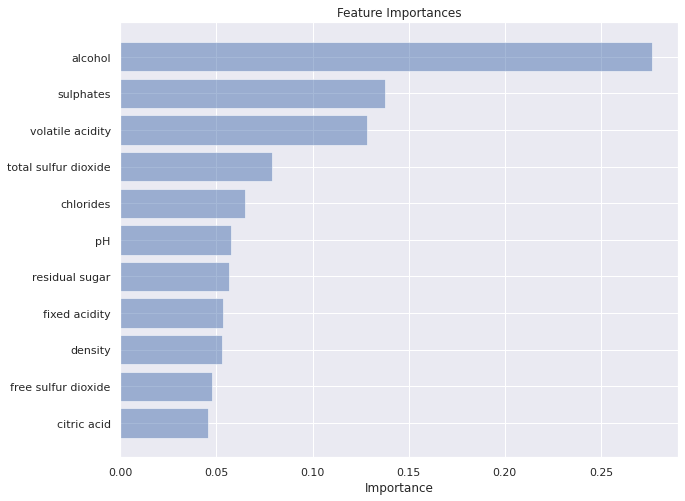

In [ ]:
classifier = RandomForestRegressor()
classifier.fit(x,y)
feature_names = x.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = x.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

plt.barh([1,2,3,4,5,6,7,8,9,10,11], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7,8,9,10,11], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Clearly, Alcohol is the most factor for quality of wine followed by sulphates Score. So the last top 3 most factor variable for quality wine is Volatile acidity variable

And we have prepared our data as required, now, finally all we need to do is split the dataset into a training and testing dataset.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.33, random_state=42)

We have now divided the data into a test set as well as a training set and hence we have come to an end of this section. Next we will move on to modelling the problem and testing.

# Modelling and testing for regression:

First we will start with linear regression and will be using Lasso, Ridge as well as ordinary linear regression for our data and compare the results and get an inference. We will be using the scikit Learn library for our regression as well as testing.

# Multiple linear regression with OLS(ordinary least squares):

Firstly we will do basic linear regression without any penalty on complexity.

In [ ]:
from sklearn.linear_model import LinearRegression
clf= LinearRegression().fit(X_train,y_train)
clf.score(X_train,y_train)

0.35632971309091954

The score above gives us the R^2 value for our dataset which simply means the amount of variability that is explained by our model. Note that higher could mean better, but often times this could be an indication of over fitting. We will take a look at the root mean square error of our model on the test set to have a better idea of the predicting power of the model.

In [ ]:
from sklearn.metrics import mean_squared_error
a=clf.predict(X_train)
train_rmse= (mean_squared_error(a,y_train)) ** 0.5
print(train_rmse)
b=clf.predict(X_test)
test_rmse= (mean_squared_error(b,y_test)) ** 0.5
test_rmse

0.6448260476994808


0.6513095193379135

We got a RMSE value of 0.6513, which tells about how accurate our values are. Again, the RMSE value is not an absolute value of and needs comparision to truly know how well our model performs, however, considering that our models output ranges from 0-10, an approx. average error of 0.64 is a respectable value.

One important thing to note is that the RMSE of the test set is smaller than that of the training set which is a good sign as it indicates that overfitting is unlikely which means that lasso regression as well as ridge regression will not necessarily give us any better answers.

Another small observation I had made was that normalizing the data did not give any substantial Reduction in RMSE.

# Multiple linear regression with Ridge regression:

Ridge regression based on L2 regularisation is a regression method that places a penalty on complexity of our model. What it essentially does is in addition to regular cost function of OLS, Ridge regression places a penalty on the size of the coefficients. This reduces the complexity by inducing a bias resulting in a lower variance. Note that we use RidgeCV(cross validation) for finding an optimal alpha which is the one hyperparameter of our model.

In [ ]:
from sklearn.linear_model import RidgeCV
alpha= np.arange(0.01,10,0.1).tolist()
clf = RidgeCV(alphas=alpha).fit(X_train, y_train)
score=clf.score(X_train, y_train)
print("R^2 =", score)
a=clf.predict(X_train)
train_rmse= (mean_squared_error(a,y_train)) ** 0.5
print("train_rmse = ", train_rmse)
b=clf.predict(X_test)
test_rmse= (mean_squared_error(b,y_test)) ** 0.5
print("test_rmse = ", test_rmse)

R^2 = 0.3552475026409204
train_rmse =  0.6453678968629118
test_rmse =  0.6534532238339344


We can see that the values are exactly the same as Ridge regression converges towards a penalty of 0 for complexity and mimics regular linear regression. Next we can take a look at lasso regression in the same manner.

# **Multiple linear regression with Lasso regression:**
Lasso regression based on L1 regularisation is a regression method that places a penalty on the complexity not just by reducing the coefficient size but by reducing it to zero and hence effectively acting as a variables selector. This method is especially helpful if there are a large number of independant variables and we need to filter out some. However, again, since the model complexity is not high the prediction is not going to be any better than linear regression. Similar to Ridge regression, alpha is the hyperparameter.

In [ ]:
from sklearn.linear_model import LassoCV
alpha= np.arange(0.01,10,0.1).tolist()
clf = LassoCV(alphas=alpha).fit(X_train, y_train)
score=clf.score(X_train, y_train)
print("R^2 =", score)
a=clf.predict(X_train)
train_rmse= (mean_squared_error(a,y_train)) ** 0.5
print("train_rmse = ", train_rmse)
b=clf.predict(X_test)
test_rmse= (mean_squared_error(b,y_test)) ** 0.5
print("test_rmse = ", test_rmse)

R^2 = 0.3130602336711903
train_rmse =  0.6661471445222236
test_rmse =  0.686960716471642


We can see that we have got substantially worse results here as some of the coefficients values have been reduced to zero and resulting in less accuracy.

With this we come to an end of the regression section and we have found regular linear regression to be the best model out of the three. This can indicate that more complex models do not necessarily mean better models and models should be selected based on our knowledge.


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **Question 2**

In [ ]:
# Importing necessary libraries
import os  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
%matplotlib inline

In [ ]:
# Loading the dataset in python with the name df and displaying first 5 rows: 
df2=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Ain/winequality-white.csv", sep = ';')
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Data cleaning/wrangling: 

Here we take the make the dataset usable for our work. 
This involves taking care of missing values, making sure all the object types are correct etc.


In [ ]:
#Getting an overall picture of the data types and shape of our dataset :
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# Taking sum of all missing values in each column:
df2.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


One thing that we can take note of is that the different variables are on different scales, and hence we might be better of rescaling all of the data which we will explore in the next section of preprocessing.

Next we will take a look at the correlation between all the variables by looking at the scatter plots between them.

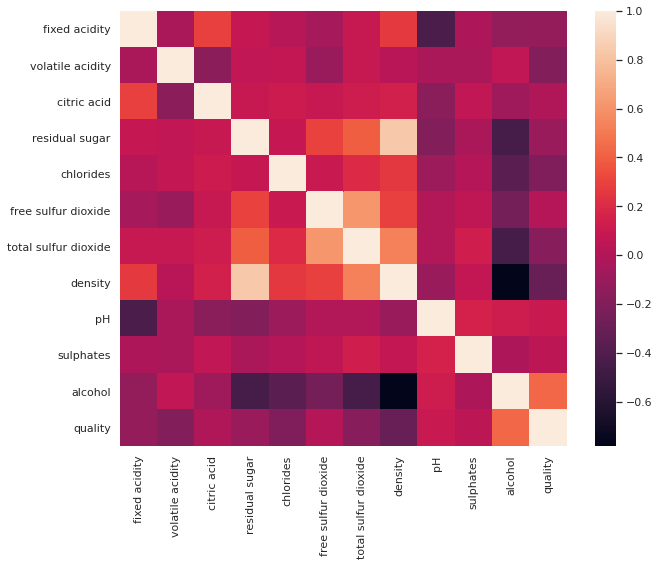

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:100: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f36c64bf780> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


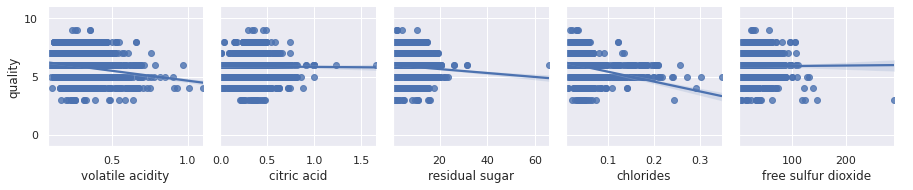

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:100: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f36c6ccc5c0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


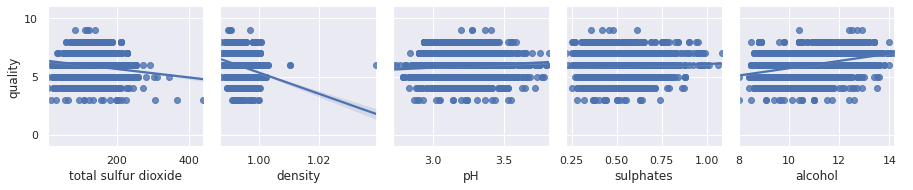

In [ ]:
g = sns.PairGrid(df2, y_vars=["quality"], x_vars=list(df2)[1:-6],palette="GnBu_d")
g.map(sns.regplot)
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);
g.add_legend()
plt.show()

a = sns.PairGrid(df2, y_vars=["quality"], x_vars=list(df2)[-6:-1],palette="GnBu_d")
a.map(sns.regplot)
a.set(ylim=(-1, 11), yticks=[0, 5, 10]);
a.add_legend()
plt.show()

# Data preprocessing



One thing we could do is eliminate some more columns which are highly correlated with each other, however, since we will be using lasso as well as ridge regression we will not make any further adjustments.

Next,we will normalize the independant variables. so as to reduce bias towards any particular variables. This is quite useful as the range of the variables are highly varied between the variables and name our independant variables x and target variable y. We will scale the values of all our independant variables to a range of 0-1. We will leave our target variable as is for convenience.

In [ ]:
x=df2[df.columns.drop("quality")]
normalized_x=preprocessing.minmax_scale(x)
y=df2["quality"]

And we have prepared our data as required, now, finally all we need to do is split the dataset into a training and testing dataset.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.33, random_state=42)

We have now divided the data into a test set as well as a training set and hence we have come to an end of this section. Next we will move on to modelling the problem and testing.

# **Modelling and testing for classification:**
We will be doing quite a few models for classification as well as a basic understanding of why the accuracy and predictions are the way they are for the various methods.

# Classification with K-Nearest Neighbours:
This is a fairly simple straightforward model which classifies each outcome based on its k nearest values. We will be choosing k =80( which is the sqrt of n), however, further research on optimal values can give us better values.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=80)
knn.fit(X_train,y_train)
g=knn.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

0.5324675324675324

We have formed the model and fitted it and got its F1-score which is a metric that combines precision as well as recall. And we have found it to be 0.532, which could be quite a bit better. We will be discussing possible reasons for the relatively low scores later.

# Classification with Support Vector Machines:
This is quite an elegant method which is quite effective however, performs its best in binary classification without many outliers and hence may not be able to perform its best here. We use the RBF kernal here as it a generally well suited kernal.

In [ ]:
from sklearn import svm
SV=svm.SVC(C=1,kernel='rbf')
SV.fit(X_train,y_train)
g=SV.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

0.5534941249226963

The f1 score only shows marginal improvement.

# Classification with Naive Bayes:
This is an extremely simple method that uses basic bayes theorem to get its outcome. A major advantage being its simplicity and efficieny. However, the model performs poorly when there is multicollinearity and works best with categorical values. We do not expect very high performance metrics for this particular method.

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
g=nb.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

0.4230055658627087

As expected, the score is considerably worse than the above two.

# Classification with Logistic regression:
Here, we will be using logistic regression to predict the classes. Note that logistic regression works best with binary values as logistics regression has two outcomes. However, it can be used to predict multiclass variables by modifying the model.

In [ ]:
from sklearn.linear_model import LogisticRegression
f=LogisticRegression(max_iter=10000)
f.fit(X_train,y_train)
g=f.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

0.5299938157081014

The model performs in line with the rest of the model.

# Classification with Decision tree classifier :
Decision tree classifiers is a highly intuitive model which performs admirably with a large number of independant variables.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
f= DecisionTreeClassifier()
f.fit(X_train,y_train)
g=f.predict(X_test)
print(metrics.accuracy_score(y_test,g))
print(metrics.f1_score(y_test,g,average="micro"))

0.5720470006184292
0.5720470006184292


This model performs the best compared to the rest of our models. One important point to note is that there is no best model for all situations. Just because Decision Tree worked best for our problem does not mean it will work the best in every situation hence it is critical to have a basic theoritical understanding of all models we work with. These are few classification models. One of the reasons as to why our models perform poorly is due to the highly subjective nature of the dataset. We can also possibly improve these results by using different models or tweaking the hyperparameters of our current models. Next,we will classify the wine into "bad wine", "good wine" and "excellent wine".

# New criteria for classification:
It has been shown that accurate predictions for a scale of 1-10 is fairly difficult to predict for our given models with high amount of accuracy. One way to make it easier is by reducing the number of outcomes or classes. We ensure these classes are still meaningful to the observer. We group the wines with a quality of 1-3 in "bad wine", 4-7 in "good wine" and 8-10 in excellent wine. We will start of making a new column in our dataset namely "wine_qual" for this new data.

In [ ]:
def qual(a):
  if 1<=a["quality"]<=3 :
    return "bad wine"
  elif 4<=a["quality"]<=7 :
    return "good wine"
  else :
    return "excellent wine"
df2["wine_qual"]=df.apply(qual,axis=1)
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_qual
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,good wine
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,good wine
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,good wine
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good wine
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good wine


Now that we have got our desired dataframe we can now classify them using some of the algorithms used above.

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **Question 3**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

In [ ]:
# get data and show some records
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Ain/Iris.csv')


In [ ]:
data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
78            6.0           2.9            4.5           1.5
39            5.1           3.4            1.5           0.2
30            4.8           3.1            1.6           0.2
27            5.2           3.5            1.5           0.2
45            4.8           3.0            1.4           0.3
147    Iris-virginica
25        Iris-setosa
148    Iris-virginica
49        Iris-setosa
145    Iris-virginica
Name: Species, dtype: object


# Visualize

In [ ]:
# see how many samples we have of each species 
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


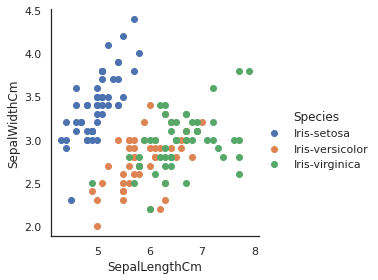

In [ ]:
#use seaborn to make scatter plot showing species for each sample
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

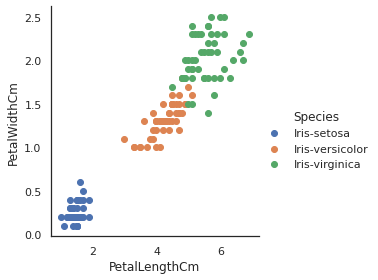

In [ ]:
# do same for petals
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

note that the species are nearly linearly separable with petal size,
but sepal sizes are more mixed.

but a clustering algorithm might have a hard time realizing that there were
three separate species, which we happen to know in advance - 
usually if you're doing exploratory data analysis (EDA), you don't know this, 
e.g. if you were looking for different groups of customers. 

it might not matter too much though - e.g. the versicolor and virginica species
seem to be very similar, so it might be just as well for your 
purposes to lump them together.

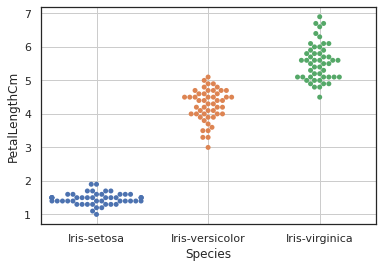

In [ ]:
# show petal length distributions in a swarm plot - 
# just shows one dimension of the data, so not as useful as the previous plots
sns.swarmplot(x="Species", y="PetalLengthCm", data=data)
plt.grid()

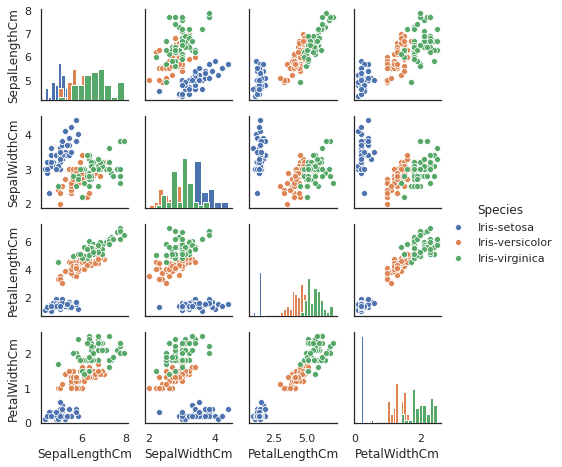

In [ ]:
# make a scatter matrix showing each pair of features in the data.
# seaborn can show the species labels as different colors, but
# normally with EDA you wouldn't have that information. 
# note: the semicolon at the end just hides a line of text output.
sns.pairplot(data, hue="Species", diag_kind="hist", size=1.6);

so again, this shows how similar versicolor and virginica are, at least with the given features.

but there could be features that you didn't measure that would more clearly separate the species.

it's the same for any unsupervised learning - you need to have the right features
to separate the groups in the best way.

In [ ]:
# the data is unbalanced (eg sepallength ~4x petalwidth), so should do feature scaling,
# otherwise the larger features will dominate the others in clustering, etc.

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
95,-0.173674,-0.124958,0.250967,0.001753
133,0.553333,-0.587764,0.762759,0.396172
22,-1.506521,1.263460,-1.568735,-1.312977
46,-0.900681,1.726266,-1.227541,-1.312977
123,0.553333,-0.819166,0.649027,0.790591


PCA

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read and upload data
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Ain/data.csv")

In [ ]:
# We don't need id and NaN data.
data.drop(["Unnamed: 32", "id"], axis = 1, inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data["diagnosis"].value_counts()

# We have 357 B and 212 M labelled data

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# Convert the diagnosis column to numeric format
data['diagnosis'] = data['diagnosis'].factorize()[0]
# Fill all Null values with zero
data = data.fillna(value=0)
# Store the diagnosis column in a target object and then drop it
target = data['diagnosis']
data = data.drop('diagnosis', axis=1)

In [ ]:
from sklearn.decomposition import PCA # Principal Component Analysis module


In [ ]:
# Turn dataframe into arrays
X = data.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

Text(0.5, 1.0, 'PCA Scatter Plot')

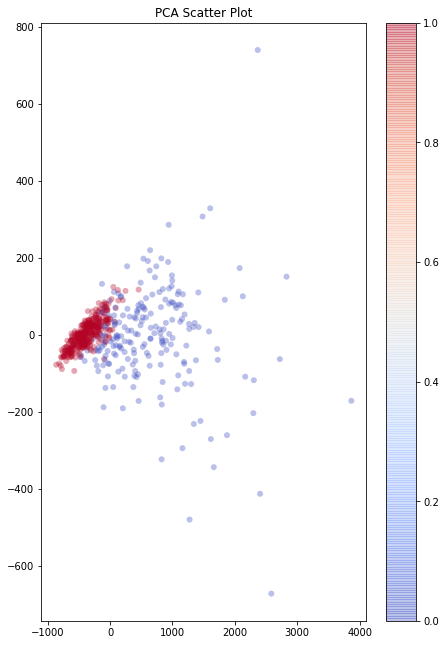

In [ ]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')

In [ ]:
# Calling Sklearn scaling method
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
# Invoke the PCA method on the standardised data
pca = PCA(n_components=2)
pca_2d_std = pca.fit_transform(X_std)



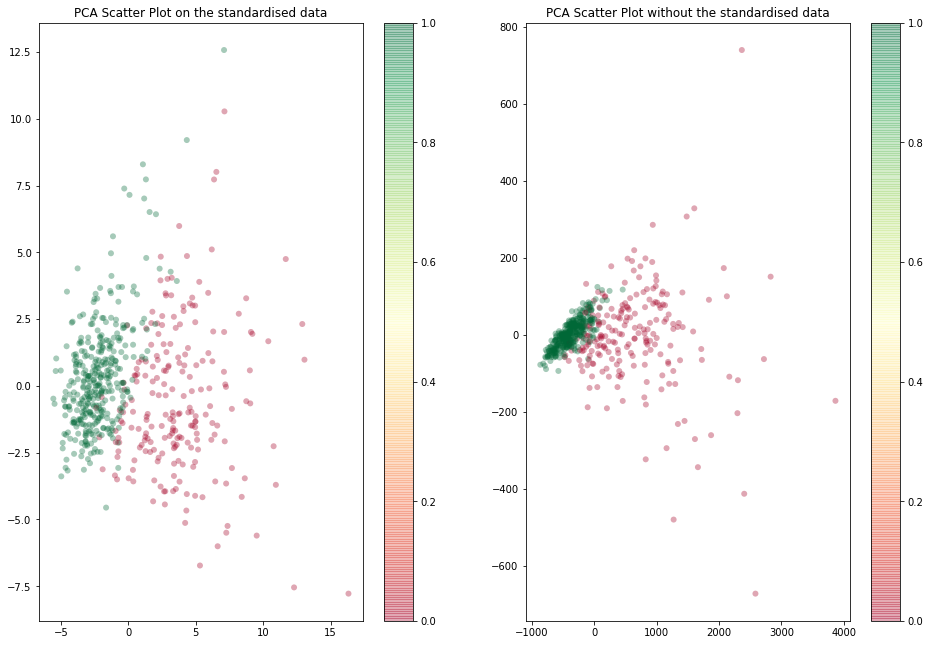

In [ ]:
# Plot the PCA Scatter Plot on the standardised data and PCA Scatter Plot without the standardised data visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d_std[:,0],pca_2d_std[:,1], c = target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot on the standardised data')
plt.subplot(122)
plt.scatter(pca_2d[:,0],pca_2d[:,1],  c = target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot without the standardised data')
plt.show()

In [ ]:
print("variance ratio: ", pca.explained_variance_ratio_)
print("sum of variance percentage: ", sum(pca.explained_variance_ratio_))

variance ratio:  [0.44272026 0.18971182]
sum of variance percentage:  0.632432076515594


Thus Principal Component Analysis is used to remove the redundant features from the datasets without losing much information.These features are low dimensional in nature.The first component has the highest variance followed by second, third and so on.PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.

# Kmeans

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Ain/data.csv")
# For clustering we do not need labels. Because we'll identify the labels.
# We don't need id and NaN data.
data.drop(["Unnamed: 32", "id"], axis = 1, inplace = True)
data.head()

# For clustering we do not need labels. Because we'll identify the labels.

dataWithoutLabels = data.drop(["diagnosis"], axis = 1)
dataWithoutLabels.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
dataWithoutLabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

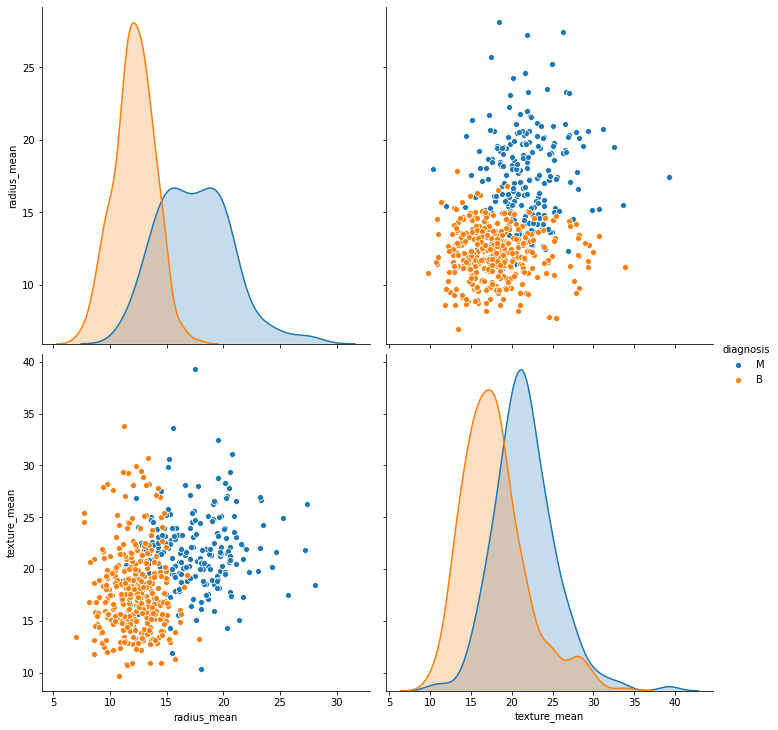

In [ ]:
# radius_mean and texture_mean features will be used for clustering. Before clustering process let's check  how our data looks.

sns.pairplot(data.loc[:,['radius_mean','texture_mean', 'diagnosis']], hue = "diagnosis", height = 5)
plt.show()

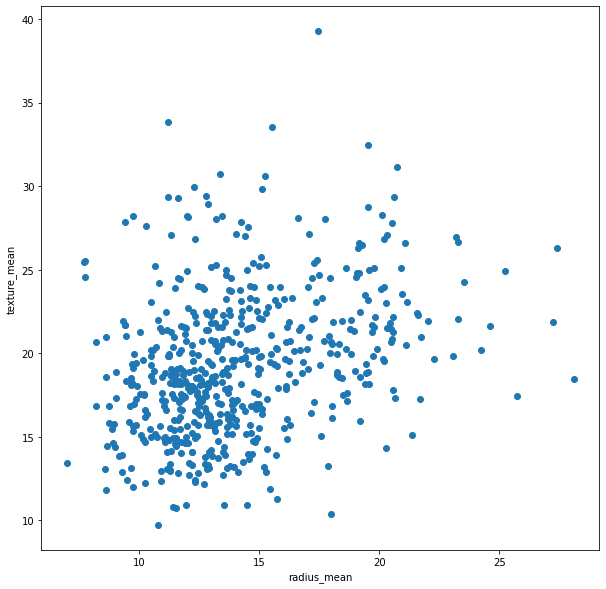

In [ ]:
# Our data looks like below plot without diagnosis label

plt.figure(figsize = (10, 10))
plt.scatter(dataWithoutLabels["radius_mean"], dataWithoutLabels["texture_mean"])
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

K-MEANS CLUSTERING

Define K centers and cluster data,
Assign random centroids,
Cluster data points according to distance from centroids (euclidean distance),
Repeat step 3 until centroid positions start not to change.

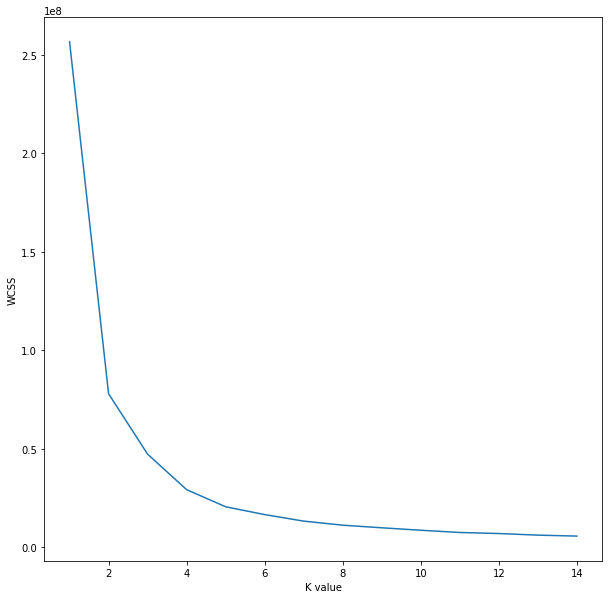

In [ ]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(dataWithoutLabels)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

Here is the result of the value of the centroids: bawah ni taw

In [ ]:
kmeans.cluster_centers_

array([[16.65732751, 23.14772926],
       [12.42323824, 16.69111765]])

In [ ]:
# Elbow point starting from 2 

dataWithoutLabels = data.loc[:,['radius_mean','texture_mean']]
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(dataWithoutLabels)
dataWithoutLabels["type"] = clusters
dataWithoutLabels["type"].unique()

array([1, 0], dtype=int32)

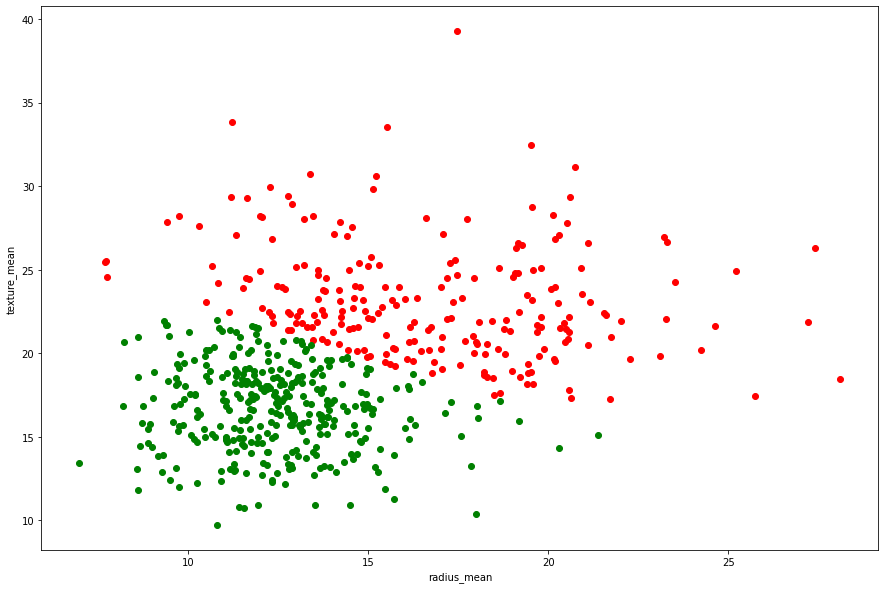

In [ ]:
# Plot data after k = 2 clustering

plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["radius_mean"][dataWithoutLabels["type"] == 0], dataWithoutLabels["texture_mean"][dataWithoutLabels["type"] == 0], color = "red")
plt.scatter(dataWithoutLabels["radius_mean"][dataWithoutLabels["type"] == 1], dataWithoutLabels["texture_mean"][dataWithoutLabels["type"] == 1], color = "green")
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

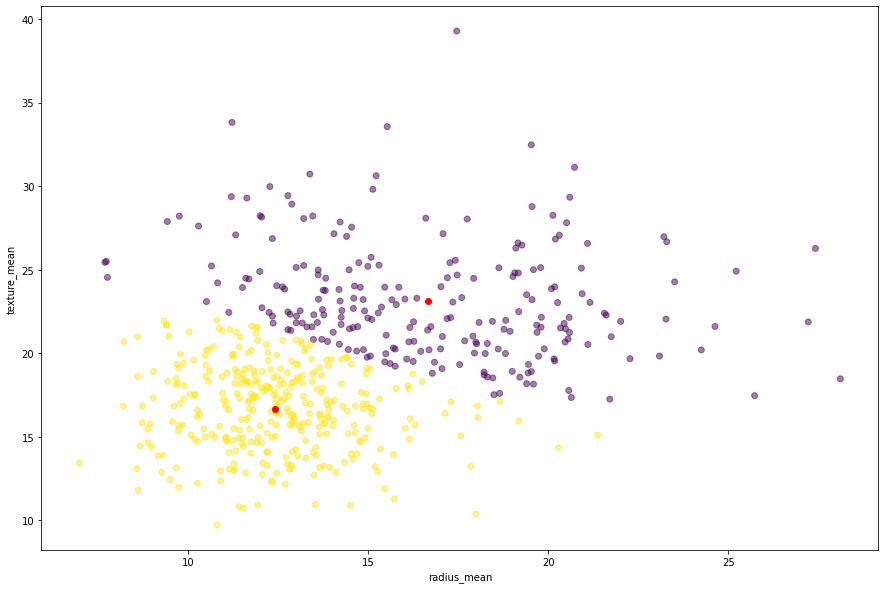

In [ ]:
# Data centroids middle of clustered scatters

plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["radius_mean"], dataWithoutLabels["texture_mean"], c = clusters, alpha = 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "red", alpha = 1)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

dataset link

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/download

K-means clustering is an extensively used technique for data cluster analysis.

It is easy to understand. Furthermore, it delivers training results quickly.
However, its performance is usually not as competitive as those of the other sophisticated clustering techniques because slight variations in the data could lead to high variance.

Furthermore, clusters are assumed to be spherical and evenly sized, something which may reduce the accuracy of the K-means clustering Python results.

Conclusion

Kmeans clustering is one of the most popular clustering algorithms and usually the first thing practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. The goal of kmeans is to group data points into distinct non-overlapping subgroups. It does a very good job when the clusters have a kind of spherical shapes. However, it suffers as the geometric shapes of clusters deviates from spherical shapes. Moreover, it also doesn’t learn the number of clusters from the data and requires it to be pre-defined. To be a good practitioner, it’s good to know the assumptions behind algorithms/methods so that you would have a pretty good idea about the strength and weakness of each method. This will help you decide when to use each method and under what circumstances. In this post, we covered both strength, weaknesses, and some evaluation methods related to kmeans.

Below are the main takeaways:

* Scale/standardize the data when applying kmeans algorithm.

* Elbow method in selecting number of clusters doesn’t usually work because the error function is monotonically decreasing for all ks.

* Kmeans gives more weight to the bigger clusters.

* Kmeans assumes spherical shapes of clusters (with radius equal to the distance between the centroid and the furthest data point) and doesn’t work well when clusters are in different shapes such as elliptical clusters.

* If there is overlapping between clusters, kmeans doesn’t have an intrinsic measure for uncertainty for the examples belong to the overlapping region in order to determine for which cluster to assign each data point.

* Kmeans may still cluster the data even if it can’t be clustered such as data that comes from uniform distributions.





